# ENGS 27 Final Project Starter Code
[Enter Names of Group Members Here]

Please copy this code to work on your own version!

The following code interfaces with the noisy channel, hosted on a Dartmouth website.

In [5]:
import math
import subprocess

def noisy_channel(bits: str) -> str:
    """
    Calls curl to POST the given bits to the test.py endpoint
    and returns the stdout response as a string.
    """
    # Build the curl command and arguments:
    cmd = [
        "curl",
        "-X", "POST",
        "-d", f"bits={bits}",
        "https://engs27.host.dartmouth.edu/cgi-bin/noisychannel.py"
    ]

    # Run the command, capture stdout/stderr
    result = subprocess.run(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True,       # return strings instead of bytes
        check=False      # we’ll inspect returncode manually
    )

    if result.returncode != 0:
        # curl failed. You can raise, log, or return stderr.
        raise RuntimeError(f"curl failed (code {result.returncode}):\n{result.stderr}")

    return result.stdout.split("<body>")[1].split("</body>")[0]


Example Usage

In [2]:
noisy_channel("0110")

'0110'

Let's collect data from different string lengths

In [86]:
import random

binary_sequences = []
q = 30;
for n in range (0,4):
  # Generate a random binary sequences of length 30, 50 and 70
  binary_sequence = ''.join(random.choice('01') for _ in range(q))
  binary_sequences.append(binary_sequence)
  q = q+30;
print(binary_sequences)

['110110010111011010110101101101', '111011100001101010110011011001101110010001001110100110011100', '111010000000010011000110101100101010110101010100011011110100010010101000010000110100001000', '110001100011110000001000111101011101010101100100011110101000100001001011011010011110000011100101000100011011000110011100']


In [87]:
num_trials = 100
binary_sequence_trials: list[str] = []

for binary_sequence in binary_sequences:
  for _ in range(num_trials):
    binary_sequence_trials.append(noisy_channel(binary_sequence))

  results_data = {
    'binary_sequence_trials': binary_sequence_trials
  }

  with open('noisy_channel_results.json', 'w') as f:
    json.dump(results_data, f, indent=2)

  print(f"Original binary sequence: {binary_sequence}")

  flip_counts = []
  for trial_result in binary_sequence_trials:
    flips = 0
    # Ensure strings are of equal length before comparing
    min_len = min(len(binary_sequence), len(trial_result))
    for i in range(min_len):
        if (int(binary_sequence[i]) ^ int(trial_result[i])) == 1: #XORing the original binary sequence with the one run through the channel
            flips += 1
    flip_counts.append(flips) #flip_counts[i] tells us how many flips were made between the og sequence and the channel output sequence for each trial i

  '''print("\nBit flips per trial:")
  for i, flips in enumerate(flip_counts):
    print(f"Trial {i+1}: {flips} flips")'''

  average_flips = sum(flip_counts) / len(flip_counts) if flip_counts else 0 #average_flips is the average amount of flips across all trials
  print(f"Average bit flips per trial: {average_flips:.2f}")

  flips_per_bit = average_flips / len(binary_sequence)
  print(f"Average bit flips per bit: {flips_per_bit:.2f}\n")

Original binary sequence: 110110010111011010110101101101
Average bit flips per trial: 0.75
Average bit flips per bit: 0.03

Original binary sequence: 111011100001101010110011011001101110010001001110100110011100
Average bit flips per trial: 7.76
Average bit flips per bit: 0.13

Original binary sequence: 111010000000010011000110101100101010110101010100011011110100010010101000010000110100001000
Average bit flips per trial: 14.38
Average bit flips per bit: 0.16

Original binary sequence: 110001100011110000001000111101011101010101100100011110101000100001001011011010011110000011100101000100011011000110011100
Average bit flips per trial: 21.73
Average bit flips per bit: 0.18



In [3]:
import matplotlib.pyplot as plt
from collections import Counter
import json

Mutation Summary:
Original '1' -> Mutations: {'1': 95, '0': 5}
Original '0' -> Mutations: {'0': 100}
Original '11' -> Mutations: {'11': 96, '01': 4}
Original '10' -> Mutations: {'11': 4, '10': 94, '01': 1, '00': 1}
Original '01' -> Mutations: {'01': 100}
Original '00' -> Mutations: {'00': 99, '01': 1}


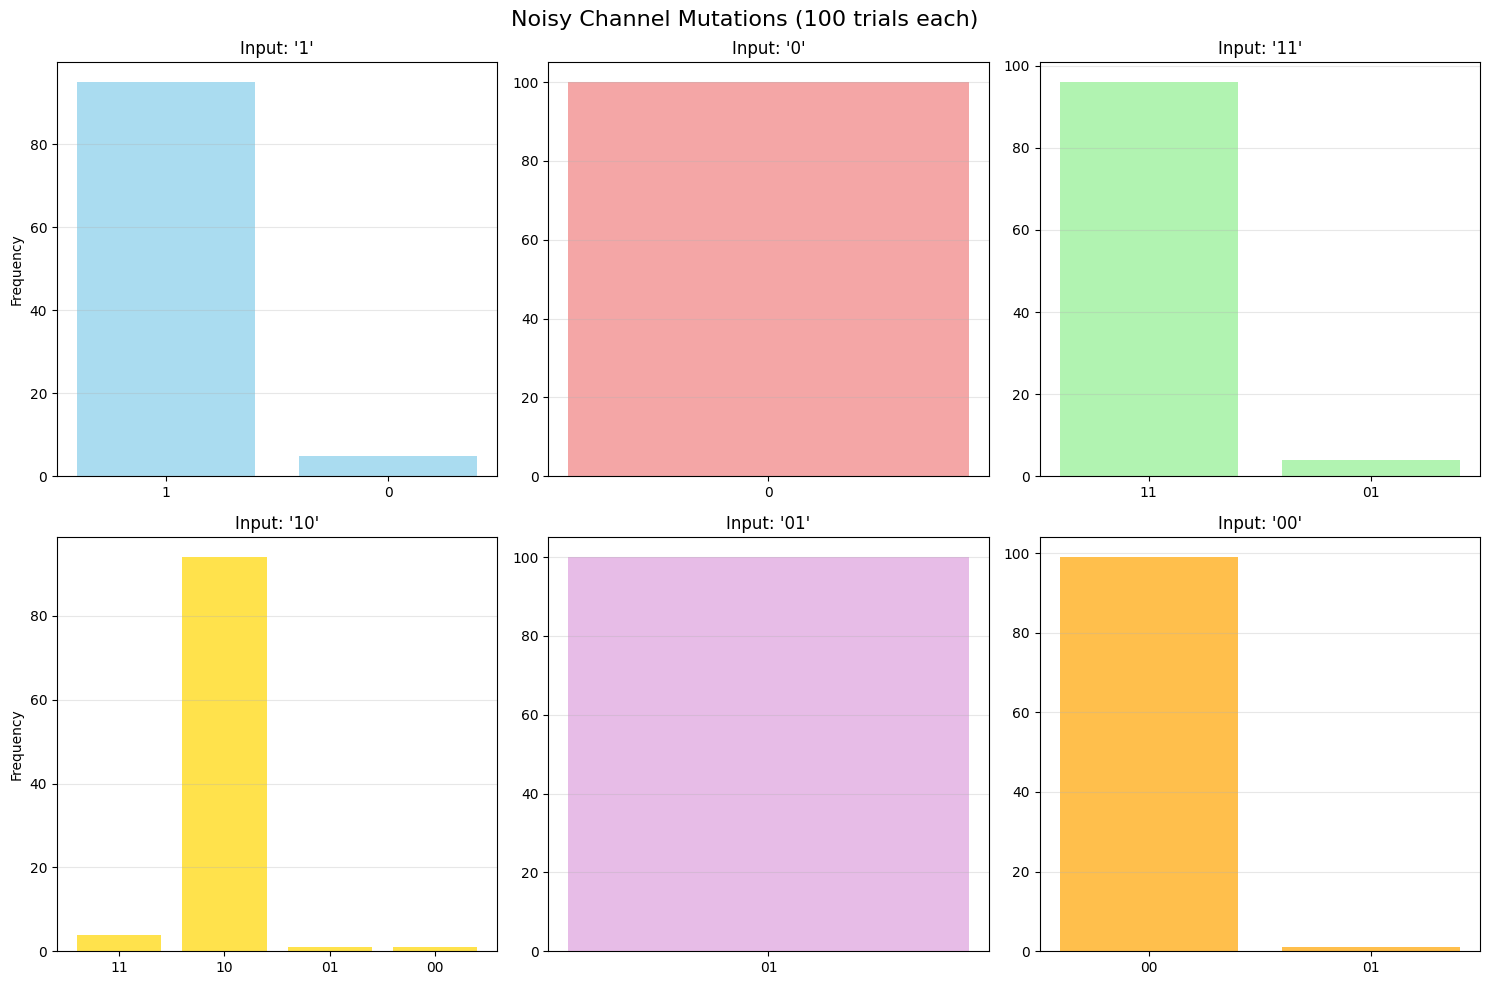

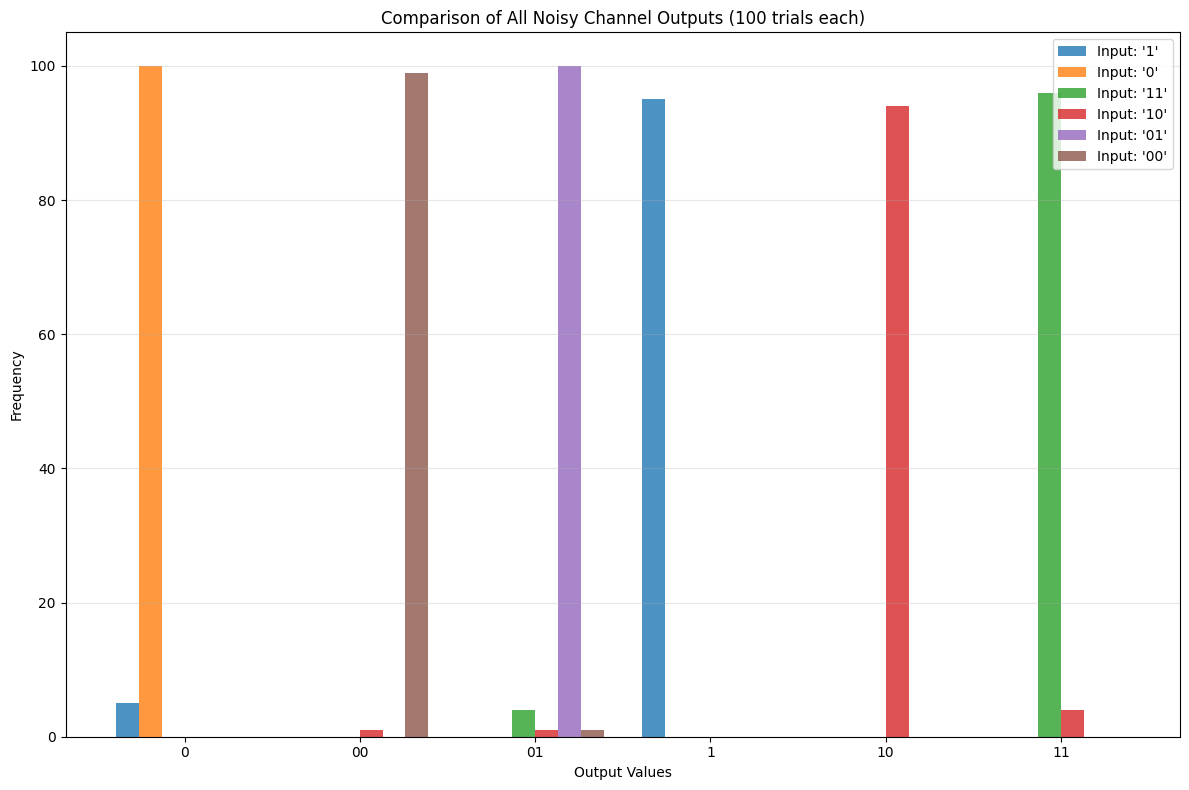


Error Rates:
'1' -> correct: 95.0%, error: 5.0%
'0' -> correct: 100.0%, error: 0.0%
'11' -> correct: 96.0%, error: 4.0%
'10' -> correct: 94.0%, error: 6.0%
'01' -> correct: 100.0%, error: 0.0%
'00' -> correct: 99.0%, error: 1.0%


In [88]:
one = '1'
zero = '0'

oneone = '11'
onezero = '10'
zeroone = '01'
zerozero = '00'

num_trials = 100

one_trials: list[str] = []
zero_trials: list[str] = []
oneone_trials: list[str] = []
onezero_trials: list[str] = []
zeroone_trials: list[str] = []
zerozero_trials: list[str] = []

for _ in range(num_trials):
    one_trials.append(noisy_channel(one))
    zero_trials.append(noisy_channel(zero))
    oneone_trials.append(noisy_channel(oneone))
    onezero_trials.append(noisy_channel(onezero))
    zeroone_trials.append(noisy_channel(zeroone))
    zerozero_trials.append(noisy_channel(zerozero))

results_data = {
    'one_trials': one_trials,
    'zero_trials': zero_trials,
    'oneone_trials': oneone_trials,
    'onezero_trials': onezero_trials,
    'zeroone_trials': zeroone_trials,
    'zerozero_trials': zerozero_trials
}

with open('noisy_channel_results.json', 'w') as f:
    json.dump(results_data, f, indent=2)

one_counts = Counter(one_trials)
zero_counts = Counter(zero_trials)
oneone_counts = Counter(oneone_trials)
onezero_counts = Counter(onezero_trials)
zeroone_counts = Counter(zeroone_trials)
zerozero_counts = Counter(zerozero_trials)

print("Mutation Summary:")
print(f"Original '1' -> Mutations: {dict(one_counts)}")
print(f"Original '0' -> Mutations: {dict(zero_counts)}")
print(f"Original '11' -> Mutations: {dict(oneone_counts)}")
print(f"Original '10' -> Mutations: {dict(onezero_counts)}")
print(f"Original '01' -> Mutations: {dict(zeroone_counts)}")
print(f"Original '00' -> Mutations: {dict(zerozero_counts)}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'Noisy Channel Mutations ({num_trials} trials each)', fontsize=16)

axes[0, 0].bar(one_counts.keys(), one_counts.values(), color='skyblue', alpha=0.7)
axes[0, 0].set_title("Input: '1'")
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].bar(zero_counts.keys(), zero_counts.values(), color='lightcoral', alpha=0.7)
axes[0, 1].set_title("Input: '0'")
axes[0, 1].grid(axis='y', alpha=0.3)

axes[0, 2].bar(oneone_counts.keys(), oneone_counts.values(), color='lightgreen', alpha=0.7)
axes[0, 2].set_title("Input: '11'")
axes[0, 2].grid(axis='y', alpha=0.3)

axes[1, 0].bar(onezero_counts.keys(), onezero_counts.values(), color='gold', alpha=0.7)
axes[1, 0].set_title("Input: '10'")
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].bar(zeroone_counts.keys(), zeroone_counts.values(), color='plum', alpha=0.7)
axes[1, 1].set_title("Input: '01'")
axes[1, 1].grid(axis='y', alpha=0.3)

axes[1, 2].bar(zerozero_counts.keys(), zerozero_counts.values(), color='orange', alpha=0.7)
axes[1, 2].set_title("Input: '00'")
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

all_outputs = set()
all_outputs.update(one_counts.keys())
all_outputs.update(zero_counts.keys())
all_outputs.update(oneone_counts.keys())
all_outputs.update(onezero_counts.keys())
all_outputs.update(zeroone_counts.keys())
all_outputs.update(zerozero_counts.keys())

sorted_outputs = sorted(all_outputs)

fig, ax = plt.subplots(figsize=(12, 8))

x_pos = range(len(sorted_outputs))
width = 0.13

ax.bar([x - 2.5*width for x in x_pos], [one_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '1'", alpha=0.8)
ax.bar([x - 1.5*width for x in x_pos], [zero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '0'", alpha=0.8)
ax.bar([x - 0.5*width for x in x_pos], [oneone_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '11'", alpha=0.8)
ax.bar([x + 0.5*width for x in x_pos], [onezero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '10'", alpha=0.8)
ax.bar([x + 1.5*width for x in x_pos], [zeroone_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '01'", alpha=0.8)
ax.bar([x + 2.5*width for x in x_pos], [zerozero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '00'", alpha=0.8)

ax.set_xlabel('Output Values')
ax.set_ylabel('Frequency')
ax.set_title(f'Comparison of All Noisy Channel Outputs ({num_trials} trials each)')
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_outputs)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nError Rates:")
print(f"'1' -> correct: {one_counts.get('1', 0)/num_trials:.1%}, error: {(num_trials - one_counts.get('1', 0))/num_trials:.1%}")
print(f"'0' -> correct: {zero_counts.get('0', 0)/num_trials:.1%}, error: {(num_trials - zero_counts.get('0', 0))/num_trials:.1%}")
print(f"'11' -> correct: {oneone_counts.get('11', 0)/num_trials:.1%}, error: {(num_trials - oneone_counts.get('11', 0))/num_trials:.1%}")
print(f"'10' -> correct: {onezero_counts.get('10', 0)/num_trials:.1%}, error: {(num_trials - onezero_counts.get('10', 0))/num_trials:.1%}")
print(f"'01' -> correct: {zeroone_counts.get('01', 0)/num_trials:.1%}, error: {(num_trials - zeroone_counts.get('01', 0))/num_trials:.1%}")
print(f"'00' -> correct: {zerozero_counts.get('00', 0)/num_trials:.1%}, error: {(num_trials - zerozero_counts.get('00', 0))/num_trials:.1%}")

Let's make a binary tree to define our huffman encoding from the Brown Corpus

In [6]:
f = open('./corpus/brown-train-sentences.txt', 'r')
corpus = f.read()

chars: set[str] = set()
char_freqs: dict[str, int] = {}

for char in corpus:
    if char in chars:
        char_freqs[char] += 1
    else:
        chars.add(char)
        char_freqs[char] = 1

class BinaryTree:
    def __init__(self, char: str, freq: int, left: 'BinaryTree' = None, right: 'BinaryTree' = None):
        self.char = char
        self.freq = freq
        self.left = left
        self.right = right

    def __repr__(self):
        return f"BinaryTree({self.char}, {self.freq}, {self.left}, {self.right})"

    def __lt__(self, other: 'BinaryTree') -> bool:
        return self.freq < other.freq

    def __le__(self, other: 'BinaryTree') -> bool:
        return self.freq <= other.freq

    def __gt__(self, other: 'BinaryTree') -> bool:
        return self.freq > other.freq

    def __ge__(self, other: 'BinaryTree') -> bool:
        return self.freq >= other.freq

    def __eq__(self, other: 'BinaryTree') -> bool:
        return self.freq == other.freq

binary_trees: list[BinaryTree] = []
# Could add punctuation, but you don't really need it for sending an intelligible message
alphabet: set[str] = {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' '}
for char, freq in char_freqs.items():
    if char in alphabet:
        binary_trees.append(BinaryTree(char, freq))

binary_trees = sorted(binary_trees, reverse=True)

Dictionary for fast encoding and decoding

In [7]:
while len(binary_trees) > 1:
    last_tree: BinaryTree = binary_trees.pop()
    second_last_tree: BinaryTree = binary_trees.pop()
    # /nac is reserved
    new_tree = BinaryTree("/nac", last_tree.freq + second_last_tree.freq, last_tree, second_last_tree)
    binary_trees.append(new_tree)
    binary_trees = sorted(binary_trees, reverse=True)

huffman_encoding: dict[str, str] = {}
huffman_decoding: dict[str, str] = {}
def find_paths(tree: BinaryTree, path: str = "") -> None:
    if tree.left is None and tree.right is None:
        huffman_encoding[tree.char] = path
        huffman_decoding[path] = tree.char
    else:
        find_paths(tree.left, path + "0")
        find_paths(tree.right, path + "1")

find_paths(binary_trees[0])
print(huffman_decoding)

{'0000': 'h', '00010': 'u', '00011': 'c', '001': 'e', '0100': 'r', '0101': 's', '0110': 'n', '011100': 'b', '011101': 'y', '011110': 'w', '011111': 'g', '1000': 'i', '1001': 'o', '1010': 'a', '10110': 'd', '10111': 'l', '110000': 'p', '1100010': 'v', '1100011000': 'z', '1100011001': 'q', '1100011010': 'j', '1100011011': 'x', '11000111': 'k', '110010': 'f', '110011': 'm', '1101': 't', '111': ' '}


Test encoding and decoding a message with our Huffman encode/decode function

In [8]:
message = "hello world"

def encode(message: str, huffman_encoding: dict[str, str]) -> str:
    encoded_message = ""
    for char in message:
        encoded_message += huffman_encoding[char]
    return encoded_message

def decode(message: str, huffman_decoding: dict[str, str]) -> str:
    decoded_message = ""
    temp_code = ""
    for char in message:
        temp_code += char
        if temp_code in huffman_decoding.keys():
            decoded_message += huffman_decoding[temp_code]
            temp_code = ""
    return decoded_message

encoded_message: str = encode(message, huffman_encoding)
print(encoded_message)
decoded_message: str = decode(encoded_message, huffman_decoding)
print(decoded_message)

000000110111101111001111011110100101001011110110
hello world


Add hamming code to our huffman encoded message, so we know when a bit was flipped

In [9]:
import math

def add_hamming_code(data_bits: str) -> str:
    parity_bits = 0
    # Would be worth memoizing
    while 2 ** parity_bits < (len(data_bits) + parity_bits + 1):
        parity_bits += 1

    hamming_coded_array: list[str] = []
    data_iterator = iter(reversed(data_bits))
    parities: list[str] = []

    # We're following https://en.wikipedia.org/wiki/Hamming_code#General_algorithm
    # theta(k)
    for i in range(1, len(data_bits) + parity_bits + 1):
        if i & (i - 1) == 0:
            hamming_coded_array.append('x')
        else:
            hamming_coded_array.append(next(data_iterator))

    # Garbage theta(n*k) code, but it works for now
    for i in range(parity_bits):
        parity = 'x'
        for j, bit in enumerate(hamming_coded_array):
            if (j + 1) & (1 << i) != 0 and bit != 'x':
                if parity == 'x' :
                    parity = int(bit)
                else:
                    parity = int(bit) ^ parity
        parities.append(str(parity))

    # theta(n)
    for i, bit in enumerate(hamming_coded_array):
        if bit == 'x':
            hamming_coded_array[i] = parities.pop(0)

    return "".join(hamming_coded_array)

def remove_hamming_code(hamming_bits: str) -> str:
    parity_bits = math.floor(math.log(len(hamming_bits), 2)) + 1

    expected_parities: list[int] = []
    parities: list[int] = [-1] * parity_bits
    data_bits: list[str] = []
    is_error: bool = False
    error_idx: int = 0

    for i in range(1, len(hamming_bits) + 1):
        if i & (i - 1) == 0:
            expected_parities.append(int(hamming_bits[i - 1]))
        else:
            data_bits.append(hamming_bits[i - 1])
            for j in range(parity_bits):
                if i & (1 << j) != 0:
                    if parities[j] == -1:
                        parities[j] = int(hamming_bits[i - 1])
                    else:
                        parities[j] = int(hamming_bits[i - 1]) ^ parities[j]

    for i in range(parity_bits):
        if expected_parities[i] != parities[i]:
            is_error = True
            error_idx += 2 ** i

    if is_error:
        original_message = list(hamming_bits)
        original_message[error_idx - 1] = str(int(original_message[error_idx - 1]) ^ 1)
        data_bits = []
        for i in range(1, len(hamming_bits) + 1):
            if i & (i - 1) != 0:
                data_bits.append(original_message[i - 1])

    return "".join(data_bits.__reversed__())

print(encoded_message)
hamming_coded_message = add_hamming_code(encoded_message)
print(hamming_coded_message)
hamming_coded_message_corrupted = str(int(hamming_coded_message) + 1)
print(hamming_coded_message_corrupted)
hamming_decoded_message = remove_hamming_code(hamming_coded_message_corrupted)
print(hamming_decoded_message)
print(decode(hamming_decoded_message, huffman_decoding))

000000110111101111001111011110100101001011110110
100111011111010001010010111101101100111101111011000000
100111011111010001010010111101101100111101111011000001
000000110111101111001111011110100101001011110110
hello world


Our own homemade Noisy Channel Function:

In [13]:
import random
from typing import Iterable, List, Tuple, Union, Optional

try:
    import numpy as np
    _HAS_NUMPY = True
except Exception:
    _HAS_NUMPY = False

BitsIn  = Union[str, Iterable[int]]
BitsOut = Union[str, List[int]]


def our_noisy_channel(
    bits: BitsIn,
    p_flip: Optional[float] = None,
    threshold: Optional[float] = None,
    seed: Optional[int] = None,
    return_indices: bool = False,
) -> Union[Tuple[BitsOut, int], Tuple[BitsOut, int, List[int]]]:


    # --- validate parameters ---
    if p_flip is None and threshold is None:
        raise ValueError("Provide either p_flip or threshold.")
    if p_flip is not None:
        if not (0.0 <= p_flip <= 1.0):
            raise ValueError("p_flip must be in [0,1].")
    if threshold is not None:
        if not (0.0 <= threshold <= 1.0):
            raise ValueError("threshold must be in [0,1].")

    rng = random.Random(seed)

    # --- normalize input to a list of ints ---
    input_is_str = isinstance(bits, str)
    if input_is_str:
        if any(ch not in "01" for ch in bits):
            raise ValueError("String inputs must contain only '0' and '1'.")
        bit_list = [int(ch) for ch in bits]
    else:
        # Accept any iterable of ints/bools
        try:
            bit_list = [int(b) for b in bits]
        except TypeError:
            raise TypeError("`bits` must be a string '01...' or an iterable of 0/1.")
        if any(b not in (0, 1) for b in bit_list):
            raise ValueError("All elements in `bits` must be 0 or 1.")

    n = len(bit_list)
    flipped_indices: List[int] = []

    # --- flip rule ---
    # If p_flip is given: flip when u < p_flip.
    # If threshold is given: flip when u > threshold (as per your description).
    use_p = p_flip is not None
    p = p_flip if use_p else (1.0 - threshold)  # effective flip probability (for reference)

    for i in range(n):
        u = rng.random()  # U(0,1)
        do_flip = (u < p_flip) if use_p else (u > threshold)
        if do_flip:
            bit_list[i] ^= 1  # flip 0<->1
            flipped_indices.append(i)

    # --- pack output in same type as input ---
    flipped_bits: BitsOut = "".join(str(b) for b in bit_list) if input_is_str else bit_list
    n_flipped = len(flipped_indices)

    if return_indices:
        return flipped_bits, n_flipped, flipped_indices
    return flipped_bits, n_flipped

We will first test our hamming error correct in our hommade noisy channel:

In [ ]:
def send_message(message: str, packet_size: tuple[int, int] = (7, 4)) -> str:
    huffman_encoded_message = encode(message, huffman_encoding)
    whole_huffman_decoded_message = ""
    # Should parallelize this, but I don't want to DDoS Bijan
    for packet in range(0, len(huffman_encoded_message), packet_size[1]):
        curr_packet = huffman_encoded_message[packet:packet + packet_size[1]]
        hamming_encoded_packet = add_hamming_code(curr_packet)
        noisy_packet = our_noisy_channel(hamming_encoded_packet, p_flip=0.03)[0]
        # noisy_packet = noisy_channel(hamming_encoded_packet) --- IGNORE ---
        whole_huffman_decoded_message += remove_hamming_code(noisy_packet)
    return decode(whole_huffman_decoded_message, huffman_decoding)

send_message("a super duper long message") #message length is 110 bits

'a super duper long message'

We calculated the error for the below 110-bit message when run through our noisy channel:

In [84]:
message_trials = 50
correct = 0

for i in range(message_trials):
    message = "a super duper long message"
    if send_message(message) == message:
        correct += 1

print("Accuracy over 50 Trials:", str(round(100*(float(correct) / float(message_trials)), 2))+"%")

Accuracy over 50 Trials: 70.0%


We now run the message through the actual web-hosted noisy channel, note that you get different outputs based off of the channel's "mood":

In [24]:
def send_message(message: str, packet_size: tuple[int, int] = (7, 4)) -> str:
    huffman_encoded_message = encode(message, huffman_encoding)
    whole_huffman_decoded_message = ""
    # Should parallelize this, but I don't want to DDoS Bijan
    for packet in range(0, len(huffman_encoded_message), packet_size[1]):
        curr_packet = huffman_encoded_message[packet:packet + packet_size[1]]
        hamming_encoded_packet = add_hamming_code(curr_packet)
        noisy_packet = noisy_channel(hamming_encoded_packet)
        whole_huffman_decoded_message += remove_hamming_code(noisy_packet)
    return decode(whole_huffman_decoded_message, huffman_decoding)

send_message("a super duper long message")

'a super dupertwso   eossage'

We calculated the error for the below 110-bit message in the web-hosted channel at about 86.67% accuracy, but this can vary, based on the channel's "mood":

In [92]:
message_trials = 50
correct = 0

for i in range(message_trials):
    message = "a super duper long message"
    if send_message(message) == message:
        correct += 1

print("Accuracy over 50 Trials:", str(round(100*(float(correct) / float(message_trials)), 2))+"%")

Accuracy over 50 Trials: 54.0%


### LDPC (Low-Density Parity-Check) coding over the noisy channel
We implement a simple systematic LDPC scheme with H = [A | I], allowing configurable block length n (data k + parity m), a min-sum BP decoder, and an end-to-end `send_message_ldpc` that operates on Huffman-encoded bits.


In [ ]:
import random
import math
from typing import Tuple, List

# ------------------------------
# LDPC matrix construction (simple, reproducible)
# ------------------------------

def build_ldpc_h(k: int, m: int, col_weight: int = 3, seed: int = 42) -> List[List[int]]:
    """
    Build a simple parity-check matrix H of size m x (k+m) in systematic form [A | I_m].
    A is m x k, each column has 'col_weight' ones placed at random rows.
    This is not capacity-optimized but works for demonstration/testing.
    """
    random.seed(seed)
    A = [[0 for _ in range(k)] for _ in range(m)]
    for col in range(k):
        rows = random.sample(range(m), min(col_weight, m))
        for r in rows:
            A[r][col] = 1
    # Identity part
    H = [row[:] + [1 if i == r else 0 for i in range(m)] for r, row in enumerate(A)]
    return H

# ------------------------------
# Systematic encoding: x = [d | p] s.t. H x^T = 0 over GF(2)
# Since H = [A|I], parity p = A * d (mod 2)
# ------------------------------

def ldpc_encode_block(data_bits: List[int], H: List[List[int]]) -> List[int]:
    m = len(H)
    k = len(H[0]) - m
    # Extract A (m x k)
    A = [row[:k] for row in H]
    # p = A * d (mod 2)
    p = []
    for r in range(m):
        s = 0
        for c in range(k):
            s ^= (A[r][c] & data_bits[c])
        p.append(s)
    return data_bits + p

# ------------------------------
# Min-sum belief propagation LDPC decoder
# ------------------------------

def ldpc_decode_block_min_sum(received_bits: List[int], H: List[List[int]], p_error: float = 0.02,
                               max_iters: int = 50) -> Tuple[List[int], bool]:
    """
    Min-sum decoder on BSC(p_error). Returns (decoded_bits, success_flag).
    Assumes systematic [d|p].
    """
    m = len(H)
    n = len(H[0])
    # Build factor graph adjacency
    checks = [[] for _ in range(m)]
    vars_neighbors = [[] for _ in range(n)]
    for r in range(m):
        for c in range(n):
            if H[r][c] == 1:
                checks[r].append(c)
                vars_neighbors[c].append(r)

    # Channel LLRs for BSC: LLR = log((1-p)/p) * (1-2*y)
    tiny = 1e-12
    Lc = math.log(max((1 - p_error) / max(p_error, tiny), tiny))
    Lch = [Lc * (1 - 2 * y) for y in received_bits]

    # Messages: r_{c->v} and q_{v->c}
    r = { (c,v): 0.0 for c in range(m) for v in checks[c] }
    q = { (v,c): Lch[v] for v in range(n) for c in vars_neighbors[v] }

    def hard_decision(llrs: List[float]) -> List[int]:
        return [0 if L >= 0 else 1 for L in llrs]

    for _ in range(max_iters):
        # Check node update (min-sum)
        for c in range(m):
            neigh = checks[c]
            # For each v in neigh, compute sign and minimum excluding v
            signs = [1 if q[(v,c)] >= 0 else -1 for v in neigh]
            abs_vals = [abs(q[(v,c)]) for v in neigh]
            total_sign = 1
            for s in signs:
                total_sign *= s
            min1 = float('inf'); min2 = float('inf'); idx_min = -1
            for i, a in enumerate(abs_vals):
                if a < min1:
                    min2 = min1
                    min1 = a
                    idx_min = i
                elif a < min2:
                    min2 = a
            for i, v in enumerate(neigh):
                sign_i = total_sign * (1 if q[(v,c)] >= 0 else -1)
                mag = min2 if i == idx_min else min1
                r[(c,v)] = sign_i * mag

        # Variable node update
        posterior = [Lch[v] for v in range(n)]
        for v in range(n):
            for c in vars_neighbors[v]:
                posterior[v] += r[(c,v)]
        # Early stop check
        x_hat = hard_decision(posterior)
        # Syndrome check H x^T == 0
        ok = True
        for c in range(m):
            s = 0
            for v in checks[c]:
                s ^= x_hat[v]
            if s != 0:
                ok = False
                break
        if ok:
            return x_hat, True
        # Update q
        for v in range(n):
            for c in vars_neighbors[v]:
                q[(v,c)] = posterior[v] - r[(c,v)]

    # Final hard decision
    x_hat = hard_decision([Lch[v] + sum(r[(c,v)] for c in vars_neighbors[v]) for v in range(n)])
    ok = True
    for c in range(m):
        s = 0
        for v in checks[c]:
            s ^= x_hat[v]
        if s != 0:
            ok = False
            break
    return x_hat, ok

# ------------------------------
# Framing and end-to-end helpers
# ------------------------------

def bits_from_str(bit_str: str) -> List[int]:
    return [1 if b == '1' else 0 for b in bit_str]

def str_from_bits(bits: List[int]) -> str:
    return ''.join('1' if b else '0' for b in bits)


def pad_bits(bits: List[int], block_k: int) -> Tuple[List[int], int]:
    """Pad with zeros so len is multiple of block_k. Return (padded, pad_len)."""
    r = len(bits) % block_k
    pad = (block_k - r) if r != 0 else 0
    return bits + [0]*pad, pad



This function will now put everything together in order to send messages through our homemade channel:

In [63]:
def send_message_ldpc_our_channel(message: str, p: float,
                       n: int = 1000,
                       k: int = 110,
                       col_weight: int = 3,
                       p_bsc: float = 0.02,
                       max_iters: int = 50,
                       seed: int = 42) -> str:
    """
    End-to-end: Huffman-encode -> chunk k bits -> LDPC encode to n -> transmit via noisy_channel ->
    LDPC decode -> remove pad -> Huffman-decode.

    - n: total block length (data k + parity m)
    - k: number of data bits per block
    """
    assert n > k > 0, "n must be > k > 0"
    m = n - k
    H = build_ldpc_h(k, m, col_weight=col_weight, seed=seed)

    # Huffman encode
    bit_str = encode(message, huffman_encoding)
    bits = bits_from_str(bit_str)

    # Pad to multiple of k
    bits_padded, pad_len = pad_bits(bits, k)

    decoded_bits_total: List[int] = []
    
    # Process each k-bit chunk
    for i in range(0, len(bits_padded), k):
        d = bits_padded[i:i+k]
        x = ldpc_encode_block(d, H)  # length n
        # Send via noisy channel as string
        tx = str_from_bits(x)
        rx = our_noisy_channel(tx, p)[0]
        y = bits_from_str(rx)
        # Decode
        x_hat, ok = ldpc_decode_block_min_sum(y, H, p_error=p_bsc, max_iters=max_iters)
        d_hat = x_hat[:k]
        decoded_bits_total.extend(d_hat)

    # Remove padding
    if pad_len:
        decoded_bits_total = decoded_bits_total[:-pad_len]

    # Huffman decode
    decoded_bit_str = str_from_bits(decoded_bits_total)
    return decode(decoded_bit_str, huffman_decoding)

And this function sends the messages through the web-hosted channel:

In [62]:
def send_message_ldpc(message: str,
                       n: int = 1000,
                       k: int = 110,
                       col_weight: int = 3,
                       p_bsc: float = 0.02,
                       max_iters: int = 50,
                       seed: int = 42) -> str:
    """
    End-to-end: Huffman-encode -> chunk k bits -> LDPC encode to n -> transmit via noisy_channel ->
    LDPC decode -> remove pad -> Huffman-decode.

    - n: total block length (data k + parity m)
    - k: number of data bits per block
    """
    assert n > k > 0, "n must be > k > 0"
    m = n - k
    H = build_ldpc_h(k, m, col_weight=col_weight, seed=seed)

    # Huffman encode
    bit_str = encode(message, huffman_encoding)
    bits = bits_from_str(bit_str)

    # Pad to multiple of k
    bits_padded, pad_len = pad_bits(bits, k)

    decoded_bits_total: List[int] = []
    
    # Process each k-bit chunk
    for i in range(0, len(bits_padded), k):
        d = bits_padded[i:i+k]
        x = ldpc_encode_block(d, H)  # length n
        # Send via noisy channel as string
        tx = str_from_bits(x)
        rx = noisy_channel(tx)
        y = bits_from_str(rx)
        # Decode
        x_hat, ok = ldpc_decode_block_min_sum(y, H, p_error=p_bsc, max_iters=max_iters)
        d_hat = x_hat[:k]
        decoded_bits_total.extend(d_hat)

    # Remove padding
    if pad_len:
        decoded_bits_total = decoded_bits_total[:-pad_len]

    # Huffman decode
    decoded_bit_str = str_from_bits(decoded_bits_total)
    return decode(decoded_bit_str, huffman_decoding)

Executing the functions to send a message through our homemade channel:

In [85]:
# Example usage: configure (n, k), column weight, and BSC p for the decoder
# Typical small demo: (n=1000, k=110) gives rate ~0.70

msg = "a super duper long message"
print("Original:", msg)

# Try a few trials to gauge robustness
trials = 50
ok = 0
for _ in range(trials):
    out = send_message_ldpc_our_channel(msg, p=0.03, n=1000, k=110, col_weight=3, p_bsc=0.02, max_iters=50, seed=123)
    if out == msg:
        ok += 1
print(f"Accuracy over {trials} trials: {ok/trials:.2%}")

# Single run print
decoded = send_message_ldpc_our_channel(msg, p=0.03, n=1000, k=110, col_weight=3, p_bsc=0.02, max_iters=50, seed=123)
print("Decoded:", decoded)

Original: a super duper long message
Accuracy over 50 trials: 78.00%
Decoded: a super duper long message


Executing the functions to send a message through the web-hosted channel, which sometimes returns clear messages:

In [83]:
# Example usage: configure (n, k), column weight, and BSC p for the decoder
# Typical small demo: (n=1000, k=110) gives rate ~0.70

msg = "a super duper long message"
print("Original:", msg)

# Try a few trials to gauge robustness
trials = 50
ok = 0
for _ in range(trials):
    out = send_message_ldpc(msg, n=1000, k=110, col_weight=3, p_bsc=0.02, max_iters=50, seed=123)
    if out == msg:
        ok += 1
print(f"Accuracy over {trials} trials: {ok/trials:.2%}")

# Single run print
decoded = send_message_ldpc(msg, n=1000, k=110, col_weight=3, p_bsc=0.02, max_iters=50, seed=123)
print("Decoded:", decoded)

Original: a super duper long message
Accuracy over 50 trials: 86.00%
Decoded: a super duper long message
